In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as f
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
from glob import glob

In [14]:
files = glob('./data/지역*.xls')
tmp_raw = []

for file in files :
    tmp = pd.read_excel(file, header=2)
    tmp_raw.append(tmp)

In [75]:
oil_station = pd.concat(tmp_raw)
oil_station.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-


In [76]:
# 휘발유를 대상으로 분석
#          상호, 주소, 휘발유, 셀프여부, 상표
# rename   oil_store , address , price , self_y_n , company
stations = pd.DataFrame({'oil_station': oil_station['상호'],
                        'address': oil_station['주소'],
                        'price': oil_station['휘발유'],
                        'self_y_n': oil_station['셀프여부'],
                        'company': oil_station['상표'],
                        })

stations.head()

,oil_station,address,price,self_y_n,company
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스


In [90]:
# 파생변수 생성(direct)
# 구별 주유소 가격을 조사하기 위해서

stations['direct'] = [addr.split()[1] for addr in stations['address']]
stations.head()

,oil_station,address,price,self_y_n,company,direct
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [93]:
# 구별 정보 확인 (unique())
# 서울특별시 -> 성동구
# 특별시 -> 도봉구

# 또 다른 방법..
# station.loc[ stations['direct'] == '서울특별시', 'direct'] = '성동구'
# station.loc[ stations['direct'] == '특별시', 'direct'] = '도봉구'

stations['direct'].replace('서울특별시', '성동구', inplace=True)
stations['direct'].replace('특별시', '도봉구', inplace=True)

In [94]:
stations['direct'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구'], dtype=object)

In [96]:
# 가격 정보 확인[ - 들어있음] 후
# 가격 정보가 기입되지 않은 주유소는 제거
# 컬럼 타입을 숫자형으로 변경

stations = stations[ stations['price'] != '-']
stations['price'] = [ int(price) for price in stations['price'] ]
stations.info()


# stations = stations.replace('-',np.nan)
# stations.dropna(inplace=True)

# stations = stations.astype({'price': 'int'})
# stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   oil_station  487 non-null    object
 1   address      487 non-null    object
 2   price        487 non-null    int64 
 3   self_y_n     487 non-null    object
 4   company      487 non-null    object
 5   direct       487 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.6+ KB


In [97]:
# 인덱스를 새롭게 정의(reset_index)
# 인덱스열을 제거
stations.reset_index(inplace=True)
stations

,index,oil_station,address,price,self_y_n,company,direct
0,0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구
...,...,...,...,...,...,...,...
482,15,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1548,N,GS칼텍스,도봉구
483,16,도담주유소,서울특별시 도봉구 도봉로 941 (도봉동),1559,N,SK에너지,도봉구
484,17,제일주유소,서울 도봉구 해등로3길 86 (창동),1598,N,S-OIL,도봉구
485,18,sk네트웍스 영신주유소,서울특별시 도봉구 방학로 151 (방학동 671-2),1639,N,SK에너지,도봉구


In [98]:
del stations['index']
# stations.drop('index', axis=1)
stations

,oil_station,address,price,self_y_n,company,direct
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
482,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1548,N,GS칼텍스,도봉구
483,도담주유소,서울특별시 도봉구 도봉로 941 (도봉동),1559,N,SK에너지,도봉구
484,제일주유소,서울 도봉구 해등로3길 86 (창동),1598,N,S-OIL,도봉구
485,sk네트웍스 영신주유소,서울특별시 도봉구 방학로 151 (방학동 671-2),1639,N,SK에너지,도봉구


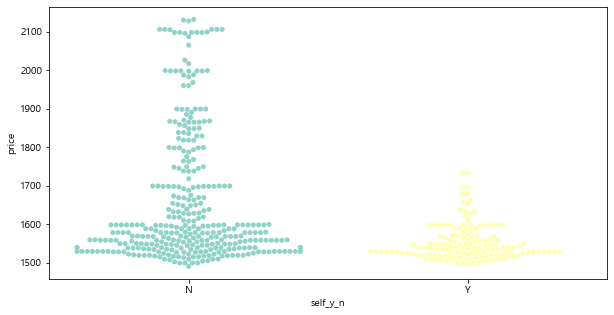

In [115]:
# 박스플롯을 이용한 셀프여부 비교 시각화

fig = plt.figure(figsize=(10,5))

# matplot으로 그리기
# stations.boxplot(column = 'price', by='self_y_n')
# plt.title('가격비교')

# sns로 그리기
# sns.boxplot(x='self_y_n', y='price', data=stations, palette='Set3')
# sns.swarmplot(x='self_y_n', y='price', data=stations, palette='Set3')

plt.show()
plt.close()

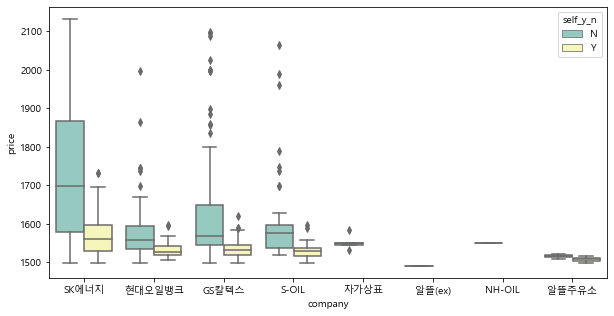

In [118]:
# 회사별 가격 시각화

fig = plt.figure(figsize=(10,5))

sns.boxplot(x='company', y='price', hue='self_y_n', data=stations, palette='Set3')

plt.show()
plt.close()


In [119]:
import json
import googlemaps
# conda install -c conda-forge googlemaps

In [123]:
# 구별 휘발유 평균가격 확인

direct_pivot = pd.pivot_table(stations, index='direct', values='price', aggfunc=np.mean)
direct_pivot.head()

,price
direct,
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556
광진구,1569.333333


In [129]:
geo_str = json.load( open('./data/02. skorea_municipalities_geo_simple.json', encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [134]:
map = f.Map(location=[37.55, 126.98], zoom_start=10.5)
f.Choropleth(geo_data = geo_str, 
             data = direct_pivot,
             columns = [direct_pivot.index, 'price'], 
             key_on='feature.id').add_to(map)

map